
# Ejercicio

Carga los datos de diabetes del paquete sklearn.datasets, extrae n componentes principales y representa los datos transformados en un grafica. Reporta el porcentaje de varianza obtenido.

Información del dataset:

El dataset contiene datos sobre la evolución de la enfermedad en una muestra de pacientes. Cada registro contiene diez variables fisiológicas (edad, sexo, peso, presión arterial) y la progresión de la enfermedad después de un año.


In [ ]:
## Diabetes dataset
## ----------------
## 
## Ten baseline variables, age, sex, body mass index, average blood
## pressure, and six blood serum measurements were obtained for each of n =
## 442 diabetes patients, as well as the response of interest, a
## quantitative measure of disease progression one year after baseline.
## 
## **Data Set Characteristics:**
## 
##   :Number of Instances: 442
## 
##   :Number of Attributes: First 10 columns are numeric predictive values
## 
##   :Target: Column 11 is a quantitative measure of disease progression one year after baseline
## 
##   :Attribute Information:
##       - age     age in years
##       - sex
##       - bmi     body mass index
##       - bp      average blood pressure
##       - s1      tc, total serum cholesterol
##       - s2      ldl, low-density lipoproteins
##       - s3      hdl, high-density lipoproteins
##       - s4      tch, total cholesterol / HDL
##       - s5      ltg, possibly log of serum triglycerides level
##       - s6      glu, blood sugar level
## 
## Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).
## 
## Source URL:
## https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import warnings
warnings.filterwarnings("ignore")


diabetes = datasets.load_diabetes()# TODO

In [2]:
diabetes.feature_names
#PCA trabaja sin los nombres de los atributos por eso no se le agrega

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [3]:
diabetes.keys()

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])

In [12]:
diabetes.target

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

In [8]:
features = diabetes.data
label = diabetes.target
df = pd.DataFrame(features)
df

,0,1,2,3,4,5,6,7,8,9
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930


In [36]:
pca = PCA(n_components=6) #TODO
pca.fit(df) #TODO


PCA(n_components=6)

In [37]:
pca.explained_variance_ratio_

array([0.40242108, 0.14923197, 0.12059663, 0.09554764, 0.06621814,
       0.06027171])

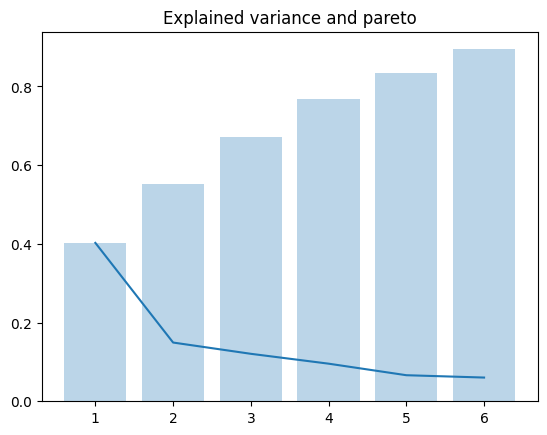

In [38]:
plt.plot(range(1,7),pca.explained_variance_ratio_)
plt.bar(range(1,7),np.cumsum(pca.explained_variance_ratio_), alpha=.3)
plt.title("Explained variance and pareto")
plt.show()

In [39]:
print ('Percentage of variance explained (2 components): ', np.cumsum(pca.explained_variance_ratio_)[1]*100)
print ('Percentage of variance explained (3 components): ', np.cumsum(pca.explained_variance_ratio_)[2]*100)
print ('Percentage of variance explained (4 components): ', np.cumsum(pca.explained_variance_ratio_)[3]*100)
print ('Percentage of variance explained (5 components): ', np.cumsum(pca.explained_variance_ratio_)[4]*100)
print ('Percentage of variance explained (6 components): ', np.cumsum(pca.explained_variance_ratio_)[5]*100)
print ('Percentage of variance explained (7 components): ', np.cumsum(pca.explained_variance_ratio_)[6]*100)
print ('Percentage of variance explained (8 components): ', np.cumsum(pca.explained_variance_ratio_)[7]*100)

Percentage of variance explained (2 components):  55.16530427751481
Percentage of variance explained (3 components):  67.22496686876482
Percentage of variance explained (4 components):  76.77973090140598
Percentage of variance explained (5 components):  83.4015448140677
Percentage of variance explained (6 components):  89.42871557026896


IndexError: index 6 is out of bounds for axis 0 with size 6

In [41]:
from sklearn.decomposition import PCA

# We transform the data using the three principal components

pca6 = PCA(n_components=6)# TODO
features_reduced_6 = pca6.fit_transform(features)# TODO

print (features_reduced_6.shape)

(442, 6)


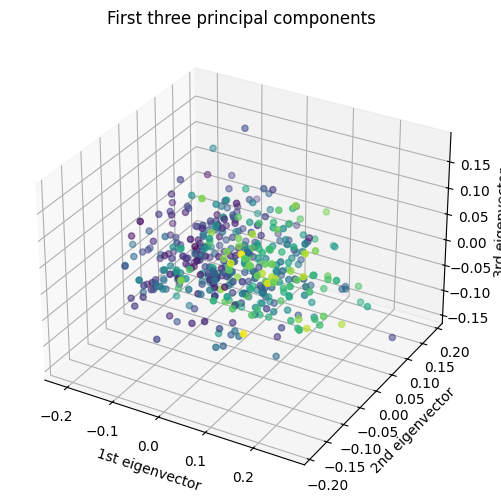

In [42]:
fig = plt.figure(1, figsize=(8, 6))
ax = plt.axes(projection ="3d")
ax.scatter(features_reduced_6[:, 0], features_reduced_6[:, 1], features_reduced_6[:, 2], c=label)
ax.set_title("First three principal components")
ax.set_xlabel("1st eigenvector")
ax.set_ylabel("2nd eigenvector")
ax.set_zlabel("3rd eigenvector")
plt.show()

In [43]:



pca2 = PCA(n_components=2)# TODO
pca2.fit(df) # TODO
features_reduced_2 = pca2.fit_transform(features)# TODO

print (features_reduced_2.shape)

(442, 2)


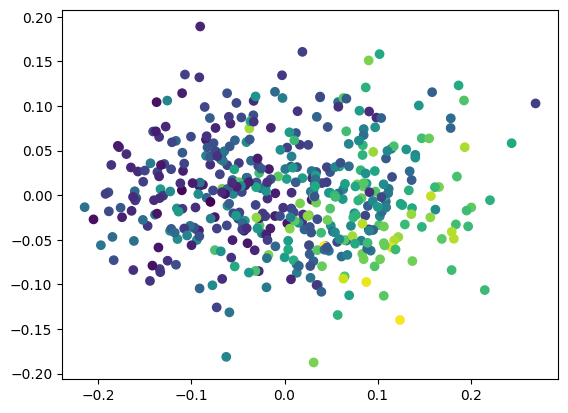

In [44]:
import matplotlib.pyplot as plt
plt.scatter(features_reduced_2[:, 0], features_reduced_2[:, 1], c=label)